<a href="https://colab.research.google.com/github/mattboan/Long-Haired-Dachshund_CNN/blob/master/ICT319_proj_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt 
import tensorflow_addons as tfa

#Import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *



#Import google drive 
from google.colab import drive

drive.mount('/content/drive');



Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/ICT319"

flynn  scrape.py  test	train  train_aug  web_scrap


In [ ]:
train_data = '/content/drive/My Drive/ICT319/train_aug'
test_data = '/content/drive/My Drive/ICT319/test'
resize = 600

In [ ]:
def one_hot_label(img):
	label = img.split('.')[0]
	if label == 'lhd':
		ohl = np.array([1,0])
	if label == 'od':
		ohl = np.array([0,1])
	return ohl

def train_data_w_labels():
	train_images = []
	for i in tqdm(os.listdir(train_data)):
		path = os.path.join(train_data, i)
		img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
		img = cv2.resize(img, (resize, resize))
		train_images.append([np.array(img), one_hot_label(i)])
	shuffle(train_images)
	return train_images

def test_data_w_labels():
	test_images = []
	for i in tqdm(os.listdir(test_data)):
                path = os.path.join(test_data, i)
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (resize, resize))
                test_images.append([np.array(img), one_hot_label(i)])
	shuffle(test_images)
	return test_images


train_images = train_data_w_labels()
test_images = test_data_w_labels()

tr_image_data = np.array([i[0] for i in train_images]).reshape(-1, resize, resize, 1)
tr_label_data = np.array([i[1] for i in train_images])

test_image_data = np.array([i[0] for i in test_images]).reshape(-1, resize, resize, 1)
test_label_data = np.array([i[1] for i in test_images])

model = Sequential()

#First Conv Layer
model.add(InputLayer(input_shape=[resize, resize, 1]))
model.add(Conv2D(filters=15, kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

#Second Conv Layer
model.add(Conv2D(filters=20,kernel_size=5, strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(tfa.layers.GroupNormalization(groups=10, axis=3))
#Fully Connected Layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
optimizer = Adam(lr=1e-4)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=tr_image_data, y=tr_label_data, epochs=12, validation_split=0.1)
model.summary()

100%|██████████| 53/53 [00:19<00:00,  2.67it/s]


Epoch 1/12
42/42 [==============================] - 2s 59ms/step - loss: 0.8667 - accuracy: 0.5676 - val_loss: 0.5777 - val_accuracy: 0.7248
Epoch 2/12
42/42 [==============================] - 2s 49ms/step - loss: 0.5920 - accuracy: 0.6772 - val_loss: 0.5628 - val_accuracy: 0.6779
Epoch 3/12
42/42 [==============================] - 2s 49ms/step - loss: 0.5445 - accuracy: 0.7125 - val_loss: 0.5109 - val_accuracy: 0.7450
Epoch 4/12
42/42 [==============================] - 2s 49ms/step - loss: 0.5063 - accuracy: 0.7628 - val_loss: 0.4597 - val_accuracy: 0.7785
Epoch 5/12
42/42 [==============================] - 2s 48ms/step - loss: 0.4439 - accuracy: 0.7928 - val_loss: 0.5193 - val_accuracy: 0.7584
Epoch 6/12
42/42 [==============================] - 2s 49ms/step - loss: 0.4025 - accuracy: 0.8288 - val_loss: 0.4092 - val_accuracy: 0.8456
Epoch 7/12
42/42 [==============================] - 2s 49ms/step - loss: 0.3441 - accuracy: 0.8498 - val_loss: 0.4008 - val_accuracy: 0.8389
Epoch 8/12
42

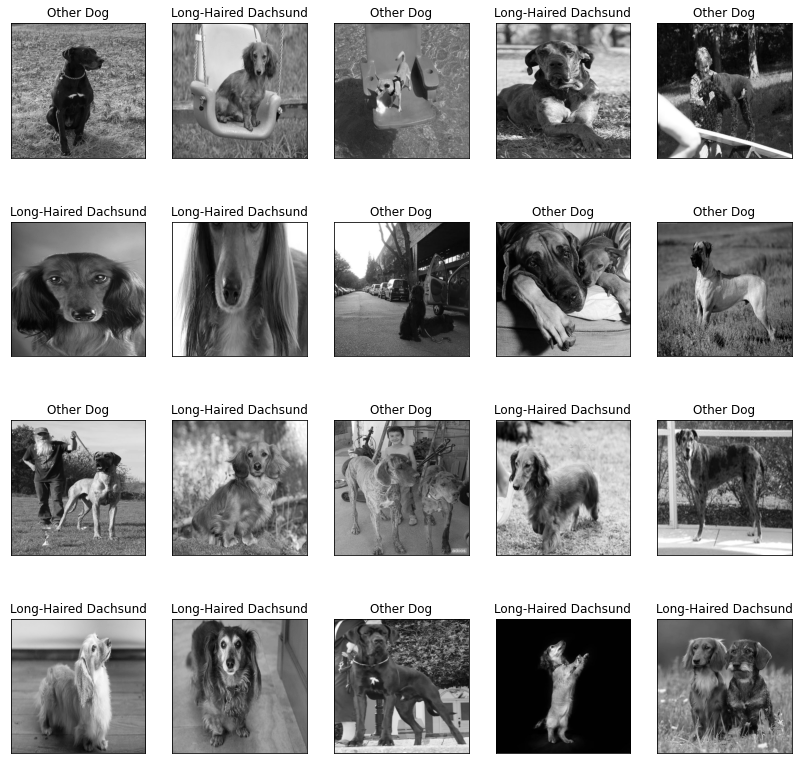

In [ ]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(test_images[30:50]):
  y = fig.add_subplot(4,5, cnt+1)
  img = data[0]
  data = img.reshape(1,resize,resize, 1)
  model_out = model.predict([data])

  #print(model_out)

  if (np.argmax(model_out)==1):
    str_label="Other Dog"
  else:
    str_label="Long-Haired Dachsund"

  y.imshow(img, cmap='gray')
  plt.title(str_label)
  y.axes.get_xaxis().set_visible(False)
  y.axes.get_yaxis().set_visible(False)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x=test_image_data, y=test_label_data, batch_size=4)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x=test_image_data[:10])
print("predictions shape:", predictions)



Evaluate on test data
14/14 [==============================] - 0s 7ms/step - loss: 0.1738 - accuracy: 0.9623
test loss, test acc: [0.17379213869571686, 0.9622641801834106]
Generate predictions for 3 samples
predictions shape: [[9.7833145e-01 2.1668555e-02]
 [1.8499564e-01 8.1500441e-01]
 [1.2655669e-02 9.8734438e-01]
 [2.1525766e-04 9.9978477e-01]
 [1.8203339e-01 8.1796658e-01]
 [4.3808085e-01 5.6191915e-01]
 [5.0217137e-02 9.4978291e-01]
 [3.4272420e-01 6.5727580e-01]
 [1.3391962e-03 9.9866080e-01]
 [8.2573742e-01 1.7426258e-01]]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


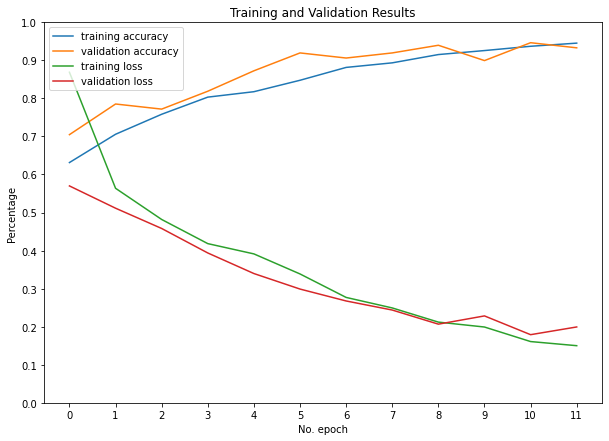

In [ ]:
# Plot the training history
print(history.history.keys())
fig = plt.figure(figsize=(10,7))

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Results')
plt.ylabel('Percentage')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 12, 1))

plt.show()